# Assignment 1 : DaintyBank Market Segmentation


###Author :

**[Diantya Pitaloka](https://www.linkedin.com/in/diantyapitaloka/)**



###Description :

The primary objective of this analysis is to thoroughly examine customer segmentation to better understand the characteristics, behaviors, and purchasing patterns of DaintyBank’s customer base. By summarizing sales performance across different customer groups, this study aims to identify which segments contribute the most to revenue and which require further attention. Additionally, the analysis seeks to develop comprehensive customer personas that represent key target audiences, enabling more personalized and effective marketing strategies.

Furthermore, the insights gained from this research will be used to uncover new business opportunities that can strengthen customer engagement and encourage greater adoption of DaintyBank’s financial products. Ultimately, this analysis supports data-driven decision-making, optimizes product offerings, and enhances long-term customer relationships.

###Dataset :

1. DaintyBank : https://drive.google.com/file/d/1dXE7wrsL37LhWl962gqluv6ZOuEnn_zG/view?usp=drive_link
2. Dictionary : https://docs.google.com/spreadsheets/d/1YO7D80qVsSC73J1ERl-GqxYYLLDqdjE5/edit?usp=sharing&ouid=108812084155815508815&rtpof=true&sd=true

###Outline  :

1. Data Extraction
2. Data Cleaning
3. Exploratory Data Analysis
4. Customer Segmentation
5. Insights and Business Recommendation

###Objective

1. Identify customer segmentation to increase engagement financial product
2. Optimize which insights can attract the increase engagement financial product








## Import Libraries

In [ ]:
# Import pandas library for data manipulation and analysis
import pandas as pd

# Import gdown library for downloading files from Google Drive (if needed)
import gdown

# Import numpy library for scientific computing and array manipulation
import numpy as np

# Import datetime library for working with dates and times
from datetime import datetime

# Import matplotlib.pyplot for creating visualizations (plots)
import matplotlib.pyplot as plt

# Import seaborn library for creating statistical data visualizations
import seaborn as sns

# Import warnings library to suppress warnings (use with caution)
import warnings
warnings.filterwarnings("ignore")  # **Caution:** May hide important warnings

# Set pandas display options to show all columns in the DataFrame (might be inconvenient for large datasets)
pd.set_option('display.max_columns', None)

## 1. Data Extraction

### 1.1 Data Sales

In [ ]:
url = "https://drive.google.com/file/d/1dXE7wrsL37LhWl962gqluv6ZOuEnn_zG/view?usp=drive_link"
output = "sales_data.csv"
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1dXE7wrsL37LhWl962gqluv6ZOuEnn_zG
To: /content/sales_data.csv
100%|██████████| 685k/685k [00:00<00:00, 97.6MB/s]


'sales_data.csv'

In [ ]:
df_sales_og = pd.read_csv('/content/sales_data.csv')
df_sales_og

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date
0,100000006,X,A,91.0,0,25000.0,1,25000.0,26,5,1996-11-03
1,100000038,X,A,69.0,0,9000.0,5,10000.0,25,10,1971-04-24
2,100000382,X,A,123.0,1,17330.0,6,20000.0,18,6,1953-01-16
3,100000612,X,A,84.0,1,25830.0,6,25000.0,14,7,1997-06-07
4,100000757,X,A,40.0,0,25000.0,3,25000.0,17,5,1989-09-13
...,...,...,...,...,...,...,...,...,...,...,...
12554,101059900,Z,E,21.0,1,15000.0,1,15000.0,21,3,1970-05-27
12555,101059915,Z,E,19.0,0,20000.0,1,20000.0,19,4,1952-03-04
12556,101059935,Z,E,21.0,0,20000.0,1,20000.0,21,4,1981-10-23
12557,101059941,Z,E,17.0,0,20000.0,2,20000.0,17,6,1975-07-21


In [ ]:
# Make a copy of the original data for data cleaning
df_sales_dc = df_sales_og.copy()

## 2. Data Cleaning


### 2.1 Understanding Dataset

In [ ]:
df_sales_dc.shape
print('Number of rows is: ', df_sales_dc.shape[0])
print('Number of columns is: ', df_sales_dc.shape[1])

Number of rows is:  12559
Number of columns is:  11


In [ ]:
df_sales_dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12559 entries, 0 to 12558
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   account_id               12559 non-null  int64  
 1   account_activity_level   12559 non-null  object 
 2   customer_value_level     12559 non-null  object 
 3   MOB                      12559 non-null  float64
 4   flag_female              12559 non-null  int64  
 5   avg_sales_L36M           11820 non-null  float64
 6   cnt_sales_L36M           12559 non-null  int64  
 7   last_sales               12559 non-null  float64
 8   month_since_last_sales   12559 non-null  int64  
 9   count_direct_promo_L12M  12559 non-null  int64  
 10  birth_date               12559 non-null  object 
dtypes: float64(3), int64(5), object(3)
memory usage: 1.1+ MB


In [ ]:
df_sales_dc.dtypes

,0
account_id,int64
account_activity_level,object
customer_value_level,object
MOB,float64
flag_female,int64
avg_sales_L36M,float64
cnt_sales_L36M,int64
last_sales,float64
month_since_last_sales,int64
count_direct_promo_L12M,int64


### 2.2 Convert Data Type
* Any identifier (e.g. client ID, account ID) should be converted to string
* All count data should be converted to integer
* All data related to money should be in float type
* All datetime/timeseries data should be time series type (not string)

*`account_id` can be changed into string since no mathematical operations will be performed on it.*


In [ ]:
# Change account_id data type into string
df_sales_dc['account_id'] = df_sales_dc['account_id'].astype(str)

In [ ]:
#Check the data type of account_id after converted
df_sales_dc.dtypes

,0
account_id,object
account_activity_level,object
customer_value_level,object
MOB,float64
flag_female,int64
avg_sales_L36M,float64
cnt_sales_L36M,int64
last_sales,float64
month_since_last_sales,int64
count_direct_promo_L12M,int64


*`MOB` can be changed into interger.*


In [ ]:
# Change account_id data type into string
df_sales_dc['MOB'] = df_sales_dc['MOB'].astype(int)

In [ ]:
#Check the data type of MOB after converted
df_sales_dc.dtypes

,0
account_id,object
account_activity_level,object
customer_value_level,object
MOB,int64
flag_female,int64
avg_sales_L36M,float64
cnt_sales_L36M,int64
last_sales,float64
month_since_last_sales,int64
count_direct_promo_L12M,int64


*birth_date can be changed into datetime.*

In [ ]:
df_sales_dc['birth_date'] = pd.to_datetime(df_sales_dc['birth_date'], format='%Y-%m-%d', errors='coerce')


In [ ]:
#Check the data type of birth_date after converted
df_sales_dc.dtypes

,0
account_id,object
account_activity_level,object
customer_value_level,object
MOB,int64
flag_female,int64
avg_sales_L36M,float64
cnt_sales_L36M,int64
last_sales,float64
month_since_last_sales,int64
count_direct_promo_L12M,int64


### 2.3 Checking for Unique Values and Handle Typo Data

However, if `account_id` is still in a numeric format (such as *int64* or *float64*), Python may misinterpret the data, especially if there are leading zeros or a special ID format.  After converting `account_id` to an object (string), checking unique values will be more accurate, especially if there is a special format in the ID.

In [ ]:
# Check unique data in categorical columns
for column in df_sales_dc.select_dtypes(include=['object']).columns:
  num_unique = df_sales_dc[column].nunique()
  print(f"Number of unique '{column}' is {num_unique}")

Number of unique 'account_id' is 12487
Number of unique 'account_activity_level' is 4
Number of unique 'customer_value_level' is 6


*We will be checking for typos in specific columns of a dataset. The columns we will be checking are:*
* *account_activity_level*
* *customer_value_level*

*The other columns in the dataset are too diverse to check for typos*

*The diverse columns are:*
* *account_id*



In [ ]:
# Count the values
list_obj = ['account_activity_level','customer_value_level']

for i in list_obj:
    unique_data = df_sales_dc[i].value_counts()
    print(unique_data.to_markdown(), '\n\n')

| account_activity_level   |   count |
|:-------------------------|--------:|
| X                        |    8238 |
| Z                        |    3442 |
| Y                        |     878 |
| XYZ                      |       1 | 


| customer_value_level   |   count |
|:-----------------------|--------:|
| E                      |    4480 |
| B                      |    2390 |
| A                      |    2204 |
| C                      |    2003 |
| D                      |    1481 |
| F                      |       1 | 




*I found one unique value in the customer_value_level column, which was XYZ. I removed it because it does not have a significant impact on the overall analysis or statistics.*

In [ ]:
df_sales_dc = df_sales_dc[df_sales_dc['account_activity_level'] != 'XYZ']
print(df_sales_dc['account_activity_level'].value_counts())

account_activity_level
X    8238
Z    3442
Y     878
Name: count, dtype: int64


*I found one unique customer_value_level labeled as F. I decided to replace F with E, assuming that this customer belongs to the lowest value level.*

In [ ]:
df_sales_dc['customer_value_level'] = df_sales_dc['customer_value_level'].replace('F', 'E')
print(df_sales_dc['customer_value_level'].value_counts())

customer_value_level
E    4481
B    2390
A    2204
C    2003
D    1480
Name: count, dtype: int64


### 2.4 Missing Values

In [ ]:
# Number of missing values in each column
df_sales_dc.isnull().sum()

,0
account_id,0
account_activity_level,0
customer_value_level,0
MOB,0
flag_female,0
avg_sales_L36M,738
cnt_sales_L36M,0
last_sales,0
month_since_last_sales,0
count_direct_promo_L12M,0


* *avg_sales_L36M, 738 row null*

#### 2.4.1 Handle Missing Values in Column `avg_sales_L36M`

*We filled the missing values in **avg_sales_36M** with 0, as it indicates no transactions occurred, and this data will be needed for further analysis.*

In [ ]:
# Impute missing values with "0"
df_sales_dc['avg_sales_L36M'].fillna("0",inplace = True)

In [ ]:
# Confirm whether null data still exist
df_sales_dc.isnull().sum()

,0
account_id,0
account_activity_level,0
customer_value_level,0
MOB,0
flag_female,0
avg_sales_L36M,0
cnt_sales_L36M,0
last_sales,0
month_since_last_sales,0
count_direct_promo_L12M,0


### 2.5 Data Duplicate

In [ ]:
# Check the duplicated
df_sales_dc[df_sales_dc['account_id'].duplicated()]

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date
146,100013585,X,E,45,1,20000.0,3,20000.0,22,6,1978-11-13
385,100032321,Z,D,21,0,15000.0,1,15000.0,21,3,1946-12-25
569,100046628,X,E,41,1,9170.0,6,10000.0,15,6,1959-09-08
698,100056011,Z,E,17,1,20000.0,1,20000.0,17,5,1960-07-03
970,100077493,Z,C,24,1,20000.0,1,20000.0,24,3,1985-05-20
...,...,...,...,...,...,...,...,...,...,...,...
12023,101015216,X,E,33,1,8250.0,4,10000.0,18,6,1959-12-13
12066,101018108,X,E,125,1,5220.0,9,5000.0,15,6,1954-10-09
12252,101034135,X,B,131,1,10000.0,3,10000.0,16,6,1947-05-29
12326,101040513,X,C,29,1,9000.0,5,10000.0,16,7,1972-06-30


In [ ]:
# Check how many cuplicate per `account_id`
df_sales_dc['account_id'].value_counts()[df_sales_dc['account_id'].value_counts() > 1]

,count
account_id,
100784337,2
100204050,2
100620958,2
100964649,2
100685883,2
...,...
101040513,2
100243212,2
100946805,2


*It is showing that duplicate data are exist, so we need to remove it based on the `account_id` since 1 `account_id` in user should be only 1 per `account_id`.*

In [ ]:
# Exclude the duplicate
df_sales_dc.drop_duplicates('account_id', keep = 'first', inplace = True)

In [ ]:
# Check the data we have
df_sales_dc.shape
print('Number of rows is: ', df_sales_dc.shape[0])

Number of rows is:  12486


*From previous step we have removed 72 duplicate.*

### 2.6 Remove Age less than 21

In [ ]:
# Determine the cutoff date
cutoff_date = datetime(2023, 5, 31)

# Calculate age using vectorization
df_sales_dc['age'] = (cutoff_date - df_sales_dc['birth_date']).dt.days // 365

# Filter data (remove ages below 21)
df_sales_dc = df_sales_dc[df_sales_dc['age'] >= 21]

# Show the result
df_sales_dc


,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,age
0,100000006,X,A,91,0,25000.0,1,25000.0,26,5,1996-11-03,26
1,100000038,X,A,69,0,9000.0,5,10000.0,25,10,1971-04-24,52
2,100000382,X,A,123,1,17330.0,6,20000.0,18,6,1953-01-16,70
3,100000612,X,A,84,1,25830.0,6,25000.0,14,7,1997-06-07,25
4,100000757,X,A,40,0,25000.0,3,25000.0,17,5,1989-09-13,33
...,...,...,...,...,...,...,...,...,...,...,...,...
12554,101059900,Z,E,21,1,15000.0,1,15000.0,21,3,1970-05-27,53
12555,101059915,Z,E,19,0,20000.0,1,20000.0,19,4,1952-03-04,71
12556,101059935,Z,E,21,0,20000.0,1,20000.0,21,4,1981-10-23,41
12557,101059941,Z,E,17,0,20000.0,2,20000.0,17,6,1975-07-21,47


### 2.7 Sales Data Cleaned Data

In [ ]:
# Create a copy after cleaning for other purpose, and its easier if there is something forgoten and needed to be clean later
df_clean = df_sales_dc.copy()
df_clean

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,age
0,100000006,X,A,91,0,25000.0,1,25000.0,26,5,1996-11-03,26
1,100000038,X,A,69,0,9000.0,5,10000.0,25,10,1971-04-24,52
2,100000382,X,A,123,1,17330.0,6,20000.0,18,6,1953-01-16,70
3,100000612,X,A,84,1,25830.0,6,25000.0,14,7,1997-06-07,25
4,100000757,X,A,40,0,25000.0,3,25000.0,17,5,1989-09-13,33
...,...,...,...,...,...,...,...,...,...,...,...,...
12554,101059900,Z,E,21,1,15000.0,1,15000.0,21,3,1970-05-27,53
12555,101059915,Z,E,19,0,20000.0,1,20000.0,19,4,1952-03-04,71
12556,101059935,Z,E,21,0,20000.0,1,20000.0,21,4,1981-10-23,41
12557,101059941,Z,E,17,0,20000.0,2,20000.0,17,6,1975-07-21,47


#Milestone 2 : EDA

In [ ]:
# Preparing a copy of df_clean for EDA
df_sales_eda = df_clean.copy()
df_sales_eda.head()

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,age
0,100000006,X,A,91,0,25000.0,1,25000.0,26,5,1996-11-03,26
1,100000038,X,A,69,0,9000.0,5,10000.0,25,10,1971-04-24,52
2,100000382,X,A,123,1,17330.0,6,20000.0,18,6,1953-01-16,70
3,100000612,X,A,84,1,25830.0,6,25000.0,14,7,1997-06-07,25
4,100000757,X,A,40,0,25000.0,3,25000.0,17,5,1989-09-13,33


In [ ]:
df_sales_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12356 entries, 0 to 12558
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   account_id               12356 non-null  object        
 1   account_activity_level   12356 non-null  object        
 2   customer_value_level     12356 non-null  object        
 3   MOB                      12356 non-null  int64         
 4   flag_female              12356 non-null  int64         
 5   avg_sales_L36M           12356 non-null  object        
 6   cnt_sales_L36M           12356 non-null  int64         
 7   last_sales               12356 non-null  float64       
 8   month_since_last_sales   12356 non-null  int64         
 9   count_direct_promo_L12M  12356 non-null  int64         
 10  birth_date               12356 non-null  datetime64[ns]
 11  age                      12356 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int

## 3. Descriptive Statictics


### 3.1 Numerical Variables

In [ ]:
numerical = df_sales_eda.select_dtypes(include = ['number'])

desc_num = numerical.describe()
desc_num.loc['kurtosis'] = numerical.kurt() # Show kurtosis statistic
desc_num.loc['skewness'] = numerical.skew() # Show Skewness statistic
desc_num.loc['variance'] = numerical.var() # Show variance statistic
desc_num = desc_num.round(2)
desc_num

,MOB,flag_female,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,age
count,12356.00,12356.00,12356.00,12356.00,12356.00,12356.00,12356.00
mean,63.81,0.54,2.65,15522.89,20.75,5.10,57.00
std,40.24,0.50,2.09,6722.33,9.24,1.34,13.97
min,15.00,0.00,0.00,0.00,3.00,0.00,21.00
25%,24.00,0.00,1.00,10000.00,17.00,4.00,46.00
50%,55.00,1.00,2.00,15000.00,18.00,5.00,59.00
75%,102.00,1.00,4.00,20000.00,21.00,6.00,69.00
max,571.00,1.00,15.00,200000.00,63.00,16.00,77.00
kurtosis,0.78,-1.97,2.07,47.00,8.86,2.16,-0.89
skewness,0.54,-0.16,1.35,1.90,2.91,0.22,-0.47


*The dataset contains 12,487 records with the following insights:*

*1. Sales Performance (cnt_sales_L36M)*
  * *On average, clients made around 2.65 transactions in the past 3 years.*
  * *The median is only 2 transactions, meaning half of the clients made 2 or fewer purchases.*
  * *The distribution is right-skewed (skewness: 1.35, kurtosis: 2.07), indicating that only a small portion of clients are highly active.*
  * *The maximum is 15 transactions, suggesting a few very active outliers.*
  * *Insight -> Most clients made only a few purchases. There’s an opportunity to increase engagement and repeat purchases from less active clients.*

*2. Gender Distribution (flag_female)*
  * *About 54% of clients are female, the rest are male.*
  * *The gender distribution is relatively balanced (skewness near 0).*
  * *Insight -> Marketing and promotions can be designed to target both genders equally.*

*3. Account Age (MOB - Months on Book)*
  * *On average, customers have been registered for about 64 months (~5 years+).*
  * *High variation (std = 40.24 months, range: 15 to 571 months).*
  * *One extreme outlier account is over 47 years old (571 months).*
  * *Insight -> It’s worth analyzing whether older accounts are more loyal or inactive.*

*4. Time Since Last Purchase (month_since_last_sales)*
  * *Average: 20.75 months, almost 2 years since the last transaction.*
  * *Median: 18 months, meaning most clients haven’t purchased in over a year.*
  * *Right-skewed with high kurtosis, indicates many clients are inactive.*
  * *Insight -> A reactivation or win-back campaign would be beneficial to re-engage dormant clients.*

*5. Direct Promotion Exposure (count_direct_promo_L12M)*
  * *On average, customers received about 5 direct promotions in the last 12 months.*
  * *Highly varied (0 to 16 promotions).*
  * *Distribution is relatively normal (low skewness and moderate kurtosis).*
  * *Insight -> Some clients receive no promotions. There’s room to improve targeting and personalization of promotional campaigns.*

*6. Client Age (age)*  
  * *The average client is 57 years old, mostly middle-aged to seniors.*
  * *Slightly left-skewed (skewness: -0.47), indicating a majority of older clients.*
  * *75% of clients are younger than 69.*
  * *Insight -> Products and communication should be tailored to the preferences of older demographics.*

### 3.2 Categorical Variables

In [ ]:
categorical = df_sales_eda.select_dtypes(exclude=['number','datetime'])
categorical.describe()

,account_id,account_activity_level,customer_value_level,avg_sales_L36M
count,12356,12356,12356,12356.0
unique,12356,3,5,277.0
top,101060006,X,E,25000.0
freq,1,8090,4409,2024.0


*The dataset contains 12,356 records with the following insights:*

***1. account_activity_level***

  * *This variable categorizes account activity levels:*

  X = high activity
  
  Y = average activity
  
  Z = low activity

  * *From the data: 'X' is the most frequent label with 8,090 accounts out of 12,356.*
  
  * *Insight -> The majority of customers fall under the high activity group. This is a positive indicator of ongoing customer engagement. However, customers in categories Y and Z could be targeted for reactivation campaigns.*

***2. customer_value_level***
  * *This indicates customer profitability, from A (highest) to E (lowest).*
  
  * *In the data: ‘E’ is the most frequent value (4,409 accounts).*
  
  * *Insight -> A large number of customers fall into the lowest profitability segment. Strategic actions might include:*
  
    * *Analyzing E-level customers: Are they new, infrequent buyers, or low spenders?*
    * *Launching loyalty programs or exclusive promotions to move them toward D/C/B levels.*

***3. avg_sales_L36M***
  * *This is the average sales per account over the last 36 months (3 years).*
  * *The value 25,000 appears 2,024 times, making it the most common.*
  * *Insight -> This suggests there may be a popular product or standard package priced around 25,000. This presents opportunities to:*
  
    * *Promote similar products,*
    * *Offer bundled deals,*
    * *Or test gradual price increases.*

### 3.3 Date Variables

In [ ]:
df_date = df_sales_eda.select_dtypes(include=['datetime'])
df_date.describe()

,birth_date
count,12356
mean,1965-12-17 16:20:14.373583680
min,1946-01-01 00:00:00
25%,1953-12-12 18:00:00
50%,1963-07-07 12:00:00
75%,1976-08-07 06:00:00
max,2002-04-24 00:00:00


### 3.4 Total Sales in the past 3 years



In [ ]:
# Convert 'avg_sales_L36M' and 'cnt_sales_L36M' to numeric types
df_sales_eda['avg_sales_L36M'] = pd.to_numeric(df_sales_eda['avg_sales_L36M'], errors='coerce')
df_sales_eda['cnt_sales_L36M'] = pd.to_numeric(df_sales_eda['cnt_sales_L36M'], errors='coerce')

# create new column to find total sales
df_sales_eda['total_sales_L36M'] = df_sales_eda['avg_sales_L36M'] * df_sales_eda['cnt_sales_L36M']
df_sales_eda

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,age,total_sales_L36M
0,100000006,X,A,91,0,25000.0,1,25000.0,26,5,1996-11-03,26,25000.0
1,100000038,X,A,69,0,9000.0,5,10000.0,25,10,1971-04-24,52,45000.0
2,100000382,X,A,123,1,17330.0,6,20000.0,18,6,1953-01-16,70,103980.0
3,100000612,X,A,84,1,25830.0,6,25000.0,14,7,1997-06-07,25,154980.0
4,100000757,X,A,40,0,25000.0,3,25000.0,17,5,1989-09-13,33,75000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12554,101059900,Z,E,21,1,15000.0,1,15000.0,21,3,1970-05-27,53,15000.0
12555,101059915,Z,E,19,0,20000.0,1,20000.0,19,4,1952-03-04,71,20000.0
12556,101059935,Z,E,21,0,20000.0,1,20000.0,21,4,1981-10-23,41,20000.0
12557,101059941,Z,E,17,0,20000.0,2,20000.0,17,6,1975-07-21,47,40000.0


In [ ]:
# Calculate the Total Sales for all client
total_sales = df_sales_eda['total_sales_L36M'].sum()
print(total_sales)

402580520.0


*Total sales in the last 3 years is **402,580,520**. That figure can be compared against business targets (if available) or with the previous period (if such data exists).*

### 3.5 Identify the number of clients with no sales in the past 3 years

What percentage does this represent compared to the total number of clients?

In [ ]:
# Filter client with the total sales = 0
no_sales_clients = df_sales_eda.loc[df_sales_eda['total_sales_L36M'] == 0]
no_sales_clients

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,age,total_sales_L36M
23,100002370,Z,A,110,0,0.0,0,15000.0,56,3,1972-08-18,50,0.0
26,100002547,X,A,61,0,0.0,0,15000.0,61,3,1987-07-24,35,0.0
37,100003731,X,A,54,1,0.0,0,15000.0,54,6,1954-03-30,69,0.0
59,100005474,Z,A,56,0,0.0,0,15000.0,56,2,1971-04-11,52,0.0
86,100008094,X,B,127,1,0.0,0,15000.0,53,3,1983-07-12,39,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12492,101054957,Z,E,51,1,0.0,0,15000.0,51,3,1993-01-22,30,0.0
12501,101055421,X,E,54,0,0.0,0,15000.0,52,5,1949-04-26,74,0.0
12504,101055837,Z,E,51,0,0.0,0,15000.0,51,3,1990-08-30,32,0.0
12521,101057435,X,E,123,0,0.0,0,15000.0,53,5,1957-05-23,66,0.0


In [ ]:
#Create column total_sales_explanation
df_sales_eda.loc[(df_sales_eda['total_sales_L36M'] == 0), 'total_sales_explanation'] = 'No Sales'
df_sales_eda.loc[(df_sales_eda['total_sales_L36M'] > 0), 'total_sales_explanation'] = 'Sales'

df_sales_eda.head()

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,age,total_sales_L36M,total_sales_explanation
0,100000006,X,A,91,0,25000.0,1,25000.0,26,5,1996-11-03,26,25000.0,Sales
1,100000038,X,A,69,0,9000.0,5,10000.0,25,10,1971-04-24,52,45000.0,Sales
2,100000382,X,A,123,1,17330.0,6,20000.0,18,6,1953-01-16,70,103980.0,Sales
3,100000612,X,A,84,1,25830.0,6,25000.0,14,7,1997-06-07,25,154980.0,Sales
4,100000757,X,A,40,0,25000.0,3,25000.0,17,5,1989-09-13,33,75000.0,Sales


In [ ]:
df_sales_eda['total_sales_explanation'].value_counts()

,count
total_sales_explanation,
Sales,11606
No Sales,750


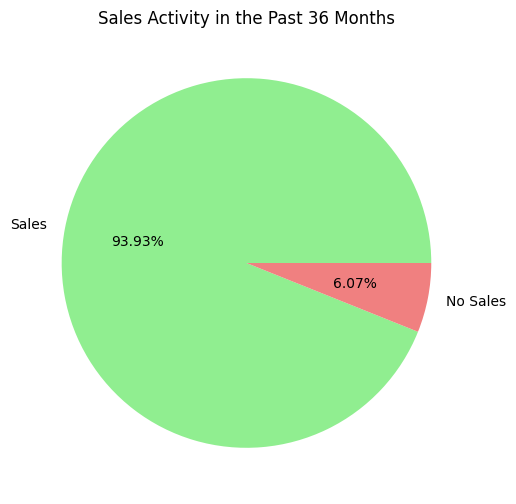

In [ ]:
# Visualization with pie chart
labels = ['Sales', 'No Sales']
sizes = [
    df_sales_eda['total_sales_explanation'].value_counts()['Sales'],
    df_sales_eda['total_sales_explanation'].value_counts()['No Sales']
]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Sales Activity in the Past 36 Months')
plt.show()

*Insights :*

***1. Majority of clients remain active***

   *Only 6.09% of all clients had no sales in the past 3 years, indicating that over 93% are still actively contributing to total sales.*

***2. 750 clients with no sales = growth opportunity***
   
   *These inactive clients represent a potential target for re-engagement campaigns. Understanding why they stopped purchasing (or never started) could uncover opportunities to recover lost revenue.*

***3. Further segmentation is recommended***
   
   Analyzing these inactive clients by category (e.g., industry, region, generation) may reveal trends or segments that require a different approach or support.

***4. Untapped economic potential***

   *If even a small percentage of these clients can be reactivated, the impact on overall sales could be significant — making this group strategically important for targeted outreach.*

###3.6 The account activity level "X" is the most active transacting

In [ ]:
# Calculate the median months since the last transaction (the smaller the value, the more active the client).
median_months = df_sales_eda.groupby('account_activity_level')['month_since_last_sales'].median()

# Calculate the average number of transactions in the past 3 years
avg_transactions = df_sales_eda.groupby('account_activity_level')['cnt_sales_L36M'].mean()

# **Combine into a single summary DataFrame.**
summary = pd.DataFrame({
    'median_month_since_last_sales': median_months,
    'average_cnt_sales_L36M': avg_transactions
})

print(summary)

                        median_month_since_last_sales  average_cnt_sales_L36M
account_activity_level                                                       
X                                                18.0                3.284302
Y                                                18.0                2.337931
Z                                                19.0                1.228504


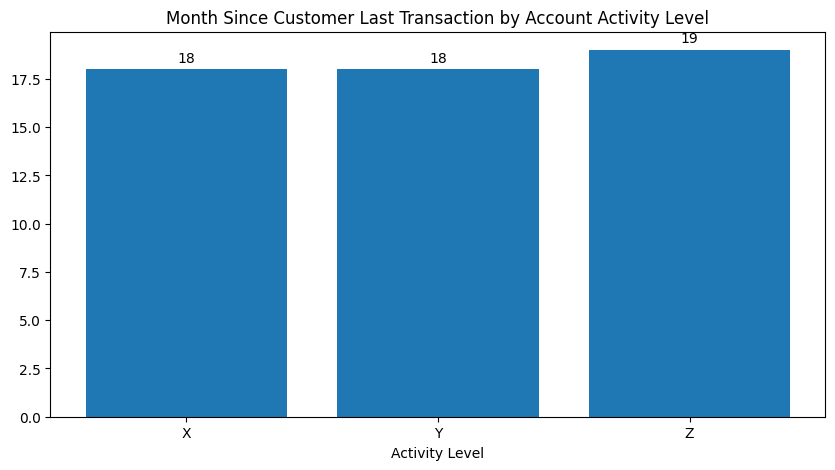

In [ ]:
# In Matplotlib, we need to define the figure and axes
fig, ax = plt.subplots(figsize=(10,5))

# Assuming 'client_activity' should be derived from 'summary'
# created in the previous cell (input-378):
client_activity = summary

# Then, we draw charts on the axis.
# For label, you typically store the axes on a variable and refer it later
ax1 = ax.bar(client_activity.index, client_activity['median_month_since_last_sales']) # Changed to 'median_month_since_last_sales'

# We can set many attribute of the axes, including title & legend
ax.bar_label(ax1, padding=3)
ax.set_title('Month Since Customer Last Transaction by Account Activity Level')
ax.set_xlabel('Activity Level')

# Then we end the chart by showing the figure
fig.show()

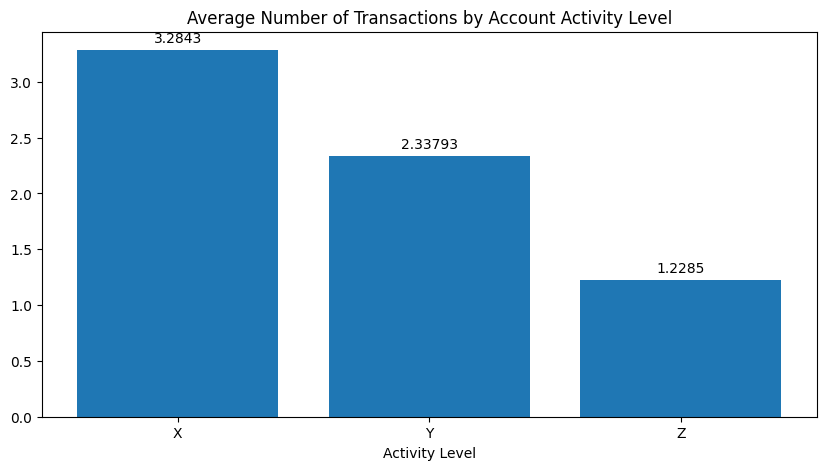

In [ ]:
# In Matplotlib, we need to define the figure and axes
fig, ax = plt.subplots(figsize=(10,5))

# Assuming 'client_activity' should be derived from 'summary'
# created in the previous cell (input-378):
client_activity = summary

# Then, we draw charts on the axis.
# For label, you typically store the axes on a variable and refer it later
ax1 = ax.bar(client_activity.index, client_activity['average_cnt_sales_L36M']) # Changed to 'median_month_since_last_sales'
# We can set many attribute of the axes, including title & legend
ax.bar_label(ax1, padding=3)
ax.set_title('Average Number of Transactions by Account Activity Level')
ax.set_xlabel('Activity Level')

# Then we end the chart by showing the figure
fig.show()

*Insight :*

*1. The median months since last sales is relatively similar across all activity levels (18–19 months), meaning that on average, clients from all groups haven't made transactions in over 1.5 years.*

*2. However, the average number of transactions shows a significant difference:*

* *Level X clients are the most active, averaging 3.29 transactions.*

* *Level Y clients are moderately active with 2.34 transactions.*

* *Level Z clients are the least active, averaging just 1.23 transactions.*

*3. This indicates that:*

* *Activity level isn't solely based on how recently a client transacted, but more on how frequently they transacted over the 3-year period.*

* *Even if the last transaction was a while ago, Level X clients are more engaged overall.*

### 3.7 Comparing profits of 2 gender

In [ ]:
# Calculate profit with margin of 2,4%
df_sales_eda['profit'] = 0.024 * df_sales_eda['total_sales_L36M']
df_sales_eda

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,age,total_sales_L36M,total_sales_explanation,profit
0,100000006,X,A,91,0,25000.0,1,25000.0,26,5,1996-11-03,26,25000.0,Sales,600.00
1,100000038,X,A,69,0,9000.0,5,10000.0,25,10,1971-04-24,52,45000.0,Sales,1080.00
2,100000382,X,A,123,1,17330.0,6,20000.0,18,6,1953-01-16,70,103980.0,Sales,2495.52
3,100000612,X,A,84,1,25830.0,6,25000.0,14,7,1997-06-07,25,154980.0,Sales,3719.52
4,100000757,X,A,40,0,25000.0,3,25000.0,17,5,1989-09-13,33,75000.0,Sales,1800.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12554,101059900,Z,E,21,1,15000.0,1,15000.0,21,3,1970-05-27,53,15000.0,Sales,360.00
12555,101059915,Z,E,19,0,20000.0,1,20000.0,19,4,1952-03-04,71,20000.0,Sales,480.00
12556,101059935,Z,E,21,0,20000.0,1,20000.0,21,4,1981-10-23,41,20000.0,Sales,480.00
12557,101059941,Z,E,17,0,20000.0,2,20000.0,17,6,1975-07-21,47,40000.0,Sales,960.00


In [ ]:
# Count the profit by the gender
df_sales_eda.groupby('flag_female')['profit'].describe().T

flag_female,0,1
count,5678.000000,6678.000000
mean,788.046467,776.790153
std,522.528170,494.789335
min,0.000000,0.000000
25%,480.000000,480.000000
50%,660.000000,695.520000
75%,1008.000000,980.160000
max,5400.000000,5865.600000


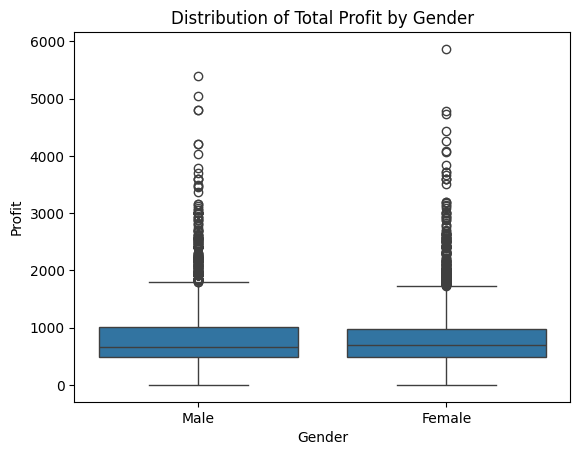

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot (data = df_sales_eda , x ='flag_female' , y ='profit')

# Add labels and title
plt.xticks([0, 1], ['Male', 'Female'])  # Change number label to category label
plt.title('Distribution of Total Profit by Gender')
plt.xlabel('Gender')
plt.ylabel('Profit')
plt.show()


*Insight :*

*1. Average vs Median:*

The average profit for males (€788) is slightly higher than for females (€776), but the median profit for females (€695) is higher than for males (€660). This suggests that, although some male customers generate very high profits, the majority of female customers produce more stable and consistent profits. This may be due to more regular purchasing behavior or a preference for products with more consistent value.

*2. Variability (Standard Deviation):*

*The standard deviation for male customers (522) is higher than for females (494), indicating that male profits are more unstable. This could mean that male purchases are more fluctuating or influenced by changing external factors. In contrast, female customers tend to have more stable and predictable spending patterns, leading to more consistent profits.*

*3. Maximum Profit:*

*The maximum profit for female customers (€5,865) is higher than for males (€5,400). While there is a difference, this number shows that females not only generate more consistent profits but also have the potential for higher returns at the top end. This could be influenced by larger purchasing decisions or greater investment in higher-priced products.*

### 3.8 Calculate the Proportion of Total Sales in the past 3 years

Does the total sales skew toward a certain demographic group? if so, what is your recommendation for the bank to improve sales performance?

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Extract birth year
df_sales_eda['birth_year'] = pd.to_datetime(df_sales_eda['birth_date']).dt.year
df_sales_eda['birth_year']


,birth_year
0,1996
1,1971
2,1953
3,1997
4,1989
...,...
12554,1970
12555,1952
12556,1981
12557,1975


In [ ]:
# 2. Categorize into generations
# Define min_year and max_year from the 'birth_year' column
min_year = df_sales_eda['birth_year'].min()
max_year = df_sales_eda['birth_year'].max()

bins = [min_year, 1964, 1980, 1996, max_year]
labels = ['Boomers', 'Gen X', 'Gen Y', 'Gen Z']
df_sales_eda['generation'] = pd.cut(df_sales_eda['birth_year'], bins=bins, labels=labels)
df_sales_eda['generation']

,generation
0,Gen Y
1,Gen X
2,Boomers
3,Gen Z
4,Gen Y
...,...
12554,Gen X
12555,Boomers
12556,Gen Y
12557,Gen X


In [ ]:
df_sales_eda['generation'].value_counts()

,count
generation,
Boomers,6188
Gen X,3603
Gen Y,2103
Gen Z,152


In [ ]:
# 3. Calculate total sales per generation
gen_sales = df_sales_eda.groupby('generation').agg(
    total_sales=('total_sales_L36M', 'mean'),
    avg_sales=('avg_sales_L36M', 'mean'),
    cnt_sales=('cnt_sales_L36M', 'count')
).reset_index()
gen_sales

,generation,total_sales,avg_sales,cnt_sales
0,Boomers,33025.331286,13524.301875,6188
1,Gen X,33025.134610,15289.039689,3603
2,Gen Y,30447.132668,14783.380884,2103
3,Gen Z,33261.973684,12771.644737,152


**Proportion of Total Sales Based on Generations**

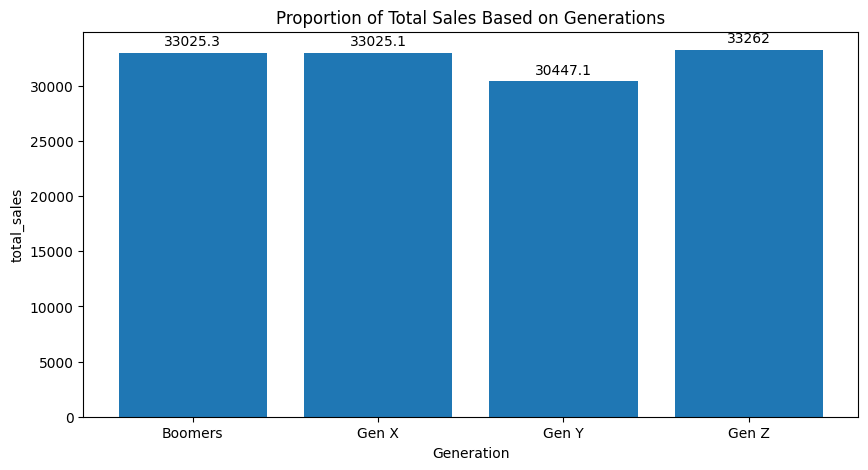

In [ ]:
# In Matplotlib, we need to define the figure and axes
fig, ax = plt.subplots(figsize=(10,5))

# Then, we draw charts on the axis.
ax1 = ax.bar(gen_sales['generation'], gen_sales['total_sales'])

# We can set many attribute of the axes, including title & legend
ax.bar_label(ax1, padding=3)
ax.set_title('Proportion of Total Sales Based on Generations')
ax.set_xlabel('Generation')
ax.set_ylabel('total_sales')

# Then we end the chart by showing the figure
fig.show()

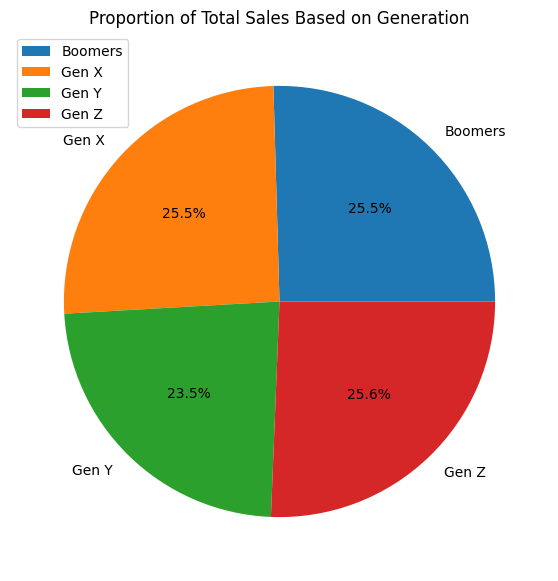

In [ ]:
# In Matplotlib, we need to define the figure and axes
fig, ax = plt.subplots(figsize=(20,7))
# Then, we draw charts on the axis.
# Remove NaN values from 'total_sales' before creating the pie chart
avg_sales_no_nan = gen_sales['total_sales'].dropna()
generation_no_nan = gen_sales['generation'][gen_sales['total_sales'].notna()]  # Corresponding generation labels
ax.pie(avg_sales_no_nan, labels=generation_no_nan, autopct='%1.1f%%') # Use 'total_sales' for consistency with the bar chart
# We can set many attribute of the axes, including title & legend
ax.set_title('Proportion of Total Sales Based on Generation')
ax.legend()
# Then we end the chart by showing the figure
fig.show()

Insight: Sales are fairly evenly distributed across generations, with Gen Z leading slightly at 25.6%, followed closely by Boomers and Gen X at 25.5%, and Gen Y at 23.5%.

This indicates a balanced contribution to total sales, with no single generation dominating.


**Proportion of Average Sales Based on Generations**

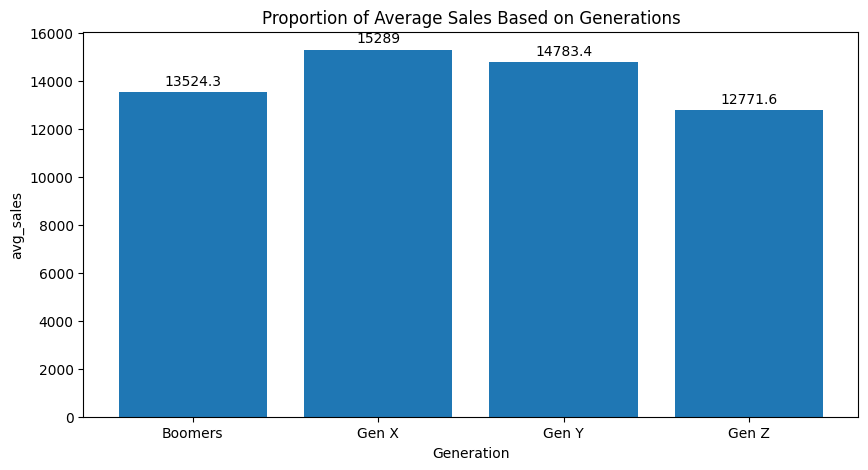

In [ ]:
# In Matplotlib, we need to define the figure and axes
fig, ax = plt.subplots(figsize=(10,5))

# Then, we draw charts on the axis.
ax1 = ax.bar(gen_sales['generation'], gen_sales['avg_sales'])

# We can set many attribute of the axes, including title & legend
ax.bar_label(ax1, padding=3)
ax.set_title('Proportion of Average Sales Based on Generations')
ax.set_xlabel('Generation')
ax.set_ylabel('avg_sales')

# Then we end the chart by showing the figure
fig.show()

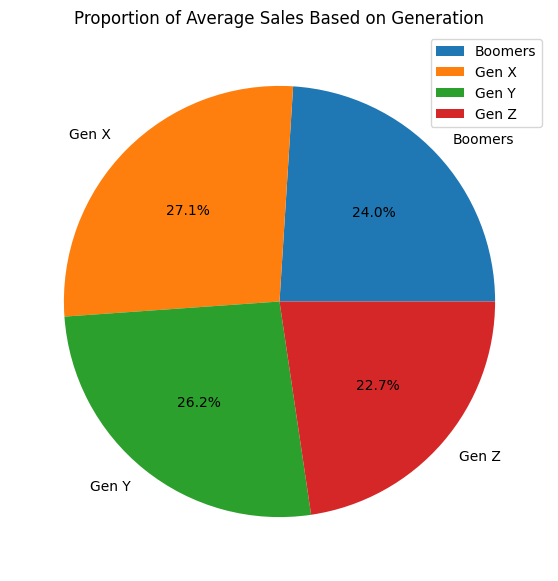

In [ ]:
# In Matplotlib, we need to define the figure and axes
fig, ax = plt.subplots(figsize=(20,7))
# Then, we draw charts on the axis.
# Remove NaN values from 'avg_sales' before creating the pie chart
avg_sales_no_nan = gen_sales['avg_sales'].dropna()
generation_no_nan = gen_sales['generation'][gen_sales['avg_sales'].notna()]  # Corresponding generation labels
ax.pie(avg_sales_no_nan, labels=generation_no_nan, autopct='%1.1f%%') # Use 'avg_sales' for consistency with the bar chart
# We can set many attribute of the axes, including title & legend
ax.set_title('Proportion of Average Sales Based on Generation')
ax.legend()
# Then we end the chart by showing the figure
fig.show()

Insight : Gen X takes the lead! With the highest share of average sales at 27.1%, Gen X shows strong and consistent purchasing power. Gen Y follows closely at 26.2%, highlighting their value as a core consumer segment.

Meanwhile, Boomers (24%) and Gen Z (22.7%) contribute slightly less—possibly reflecting different spending habits or lifestyle priorities.







**Proportion of Count of Sales (Sales Frequency) Based on Generations**

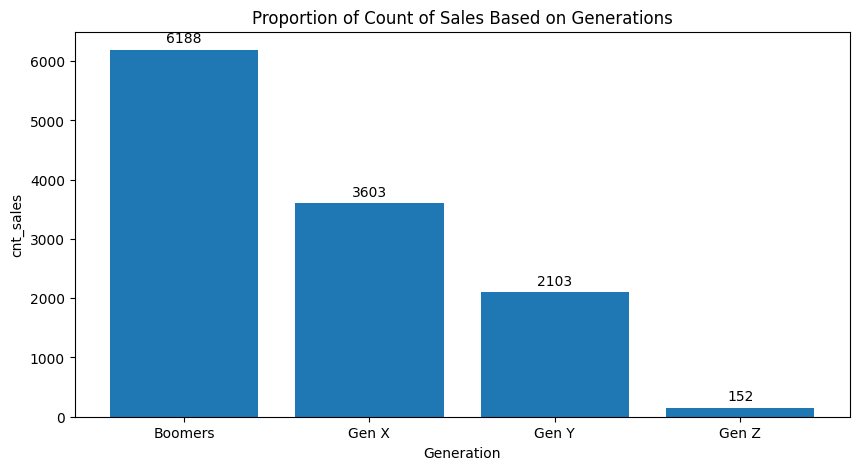

In [ ]:
# In Matplotlib, we need to define the figure and axes
fig, ax = plt.subplots(figsize=(10,5))

# Then, we draw charts on the axis.
ax1 = ax.bar(gen_sales['generation'], gen_sales['cnt_sales'])

# We can set many attribute of the axes, including title & legend
ax.bar_label(ax1, padding=3)
ax.set_title('Proportion of Count of Sales Based on Generations')
ax.set_xlabel('Generation')
ax.set_ylabel('cnt_sales')

# Then we end the chart by showing the figure
fig.show()

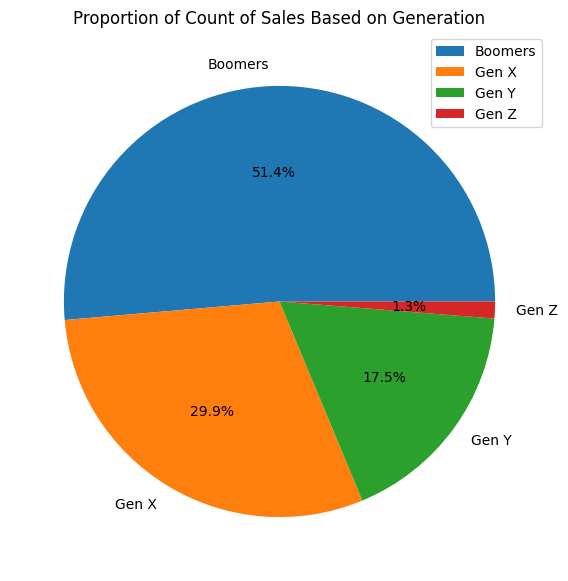

In [ ]:
# In Matplotlib, we need to define the figure and axes
fig, ax = plt.subplots(figsize=(20,7))
# Then, we draw charts on the axis.
# Remove NaN values from 'cnt_sales' before creating the pie chart
avg_sales_no_nan = gen_sales['cnt_sales'].dropna()
generation_no_nan = gen_sales['generation'][gen_sales['cnt_sales'].notna()]  # Corresponding generation labels
ax.pie(avg_sales_no_nan, labels=generation_no_nan, autopct='%1.1f%%') # Use 'cnt_sales' for consistency with the bar chart
# We can set many attribute of the axes, including title & legend
ax.set_title('Proportion of Count of Sales Based on Generation')
ax.legend()
# Then we end the chart by showing the figure
fig.show()

### 3.9 Relationship between increasing the number of email and SMS and improved total sales

if so, what is your recommendation for the bank to improve its sales performance?

In [ ]:
#Filter month_since_last_sales >= 12
df_sales_eda_l1y = df_sales_eda[df_sales_eda['month_since_last_sales'] <= 12]

In [ ]:
# Group by count_direct_promo_L12M and calculate total sales per group:
promo_sales = df_sales_eda_l1y.groupby('count_direct_promo_L12M').agg(
    avg_total_sales=('total_sales_L36M', 'mean'),
).reset_index()
promo_sales

,count_direct_promo_L12M,avg_total_sales
0,2,32000.000000
1,3,12998.000000
2,4,27226.000000
3,5,27274.444444
4,6,32465.833333
5,7,43317.391304
6,8,42607.833333
7,9,48724.583333
8,10,48942.500000
9,11,55323.076923


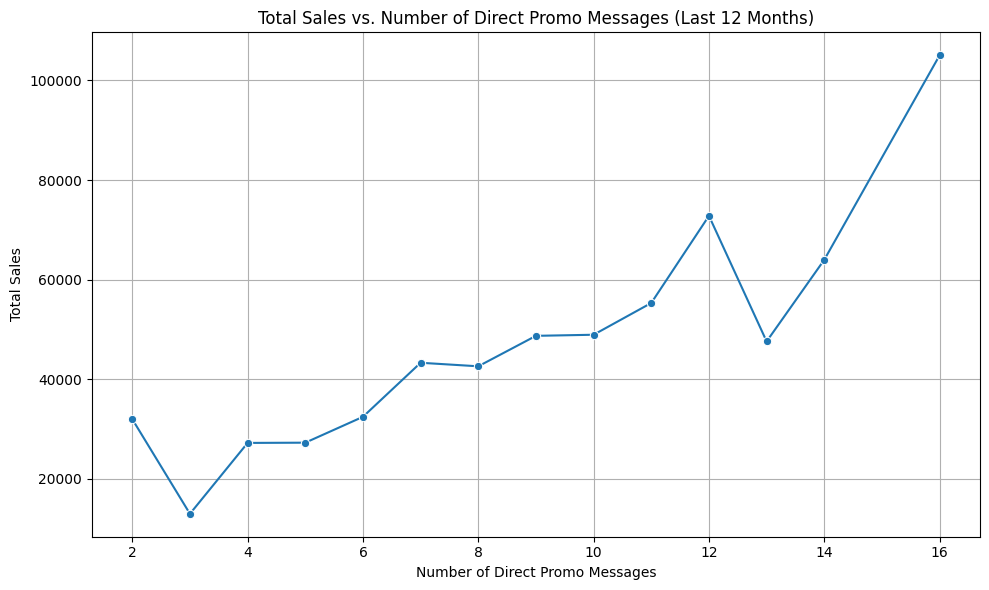

In [ ]:
# Visualize the relationship using a line chart:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.lineplot(data=promo_sales, x='count_direct_promo_L12M', y='avg_total_sales', marker='o')
plt.title('Total Sales vs. Number of Direct Promo Messages (Last 12 Months)')
plt.xlabel('Number of Direct Promo Messages')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

*Insight :*

*1. The more frequent a customer receives direct promotions (via email, SMS, etc.), the higher their average sales. However, this effect isn't strictly linear — there's a compelling pattern that can be leveraged strategically.*

*2. 📉 Customers who received only 2–5 promotions per year had low average sales, ranging between €12.99 to €32.00. This suggests that occasional promotions are not enough to drive meaningful purchasing behavior.*

*3. 📈 A turning point appears after 6 promotions, where average sales start to rise significantly, reaching around €48.94 at 10 promotions. This highlights the importance of consistent engagement to influence customer spending.*

*4. ✨ Most notably, customers who received 12 to 16 promotions annually reached average sales of up to €105.05 — that’s more than 7x higher compared to those who only received 3 promotions (€12.99). This indicates that frequent, well-timed promotions can unlock significantly higher customer value.*

*5. ⚠️ Interestingly, customers who received 13 promotions showed a slight drop (€47.60) compared to 12 (€72.81) or 14 promotions (€64.00), implying that promotion quality and timing matter just as much as frequency.*

*6. 🎯 Takeaway: A powerful promotion strategy isn’t just about how often — it’s also about when and how the message is delivered. To maximize customer value, businesses should prioritize personalized, consistent, and relevant outreach.*

##Customer Segmentation

Reasons to Choose **K-Means**:
1. Simple and Effective: K-Means is easy to understand and implement, making it perfect for customer segmentation without requiring complex models.

2. Suitable for Numerical Data: K-Means works really well with numerical data like total sales and transaction frequency, which we have available.

3. Helps with Targeted Marketing: By grouping similar customers, we can create more personalized offers for each group, such as loyalty programs or special promotions.

4. Easy to Interpret: The results from K-Means are easy to analyze, and we can clearly see the average values for each feature within each cluster, such as average sales or transaction frequency per client.

5. Scalable with Data Growth: If the dataset grows, K-Means can be easily reapplied to update customer segmentation.

Conclusion:
K-Means is a simple, fast, and easy-to-interpret method, making it ideal for segmenting customers based on their behavior and targeting marketing strategies more effectively.

In [ ]:
# Make a copy of the clean data for segmentation
df_sales_segmentation = df_sales_eda.copy()
df_sales_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12356 entries, 0 to 12558
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   account_id               12356 non-null  object        
 1   account_activity_level   12356 non-null  object        
 2   customer_value_level     12356 non-null  object        
 3   MOB                      12356 non-null  int64         
 4   flag_female              12356 non-null  int64         
 5   avg_sales_L36M           12356 non-null  float64       
 6   cnt_sales_L36M           12356 non-null  int64         
 7   last_sales               12356 non-null  float64       
 8   month_since_last_sales   12356 non-null  int64         
 9   count_direct_promo_L12M  12356 non-null  int64         
 10  birth_date               12356 non-null  datetime64[ns]
 11  age                      12356 non-null  int64         
 12  total_sales_L36M         12356 non-nu

###4.1 Data Preprocessing

To increase customer engagement with DaintyBank products, we will segment customers based on total_sales_L36M and cnt_sales_L36M. These features were chosen as segmentation criteria due to their strong relevance to product usage at DaintyBank.

Reasoning:

1. **Total Sales (total_sales_L36M)**: This represents the total amount of money spent by a customer over the last 36 months. Customers who have made higher total purchases are likely to be more engaged with the bank’s products, and targeting these customers can encourage them to use products more frequently. By segmenting based on total sales, DaintyBank can identify high-value customers who are more likely to respond to marketing campaigns and promotions.

2. **Count of Sales (cnt_sales_L36M)**: This represents the total number of sales made by a customer over the last 36 months. Customers with a higher number of transactions are likely to be loyal and frequent users of DaintyBank’s products, indicating a strong relationship with the bank. Segmenting by this feature enables DaintyBank to focus on high-frequency users who may be more open to adopting additional products or services offered by the bank.

In [ ]:
df_sales_segmentation_feature = df_sales_segmentation[['total_sales_L36M','cnt_sales_L36M']]
df_sales_segmentation_feature

,total_sales_L36M,cnt_sales_L36M
0,25000.0,1
1,45000.0,5
2,103980.0,6
3,154980.0,6
4,75000.0,3
...,...,...
12554,15000.0,1
12555,20000.0,1
12556,20000.0,1
12557,40000.0,2


####4.1.1 Scalling Method Recommendation

These recommendations are intended to guide the selection of an appropriate scaling method based on data distribution.The choice of scaling method for K-Means is not always straightforward and may require experimentation. The suitability of a particular method should be assessed by the interpretability of the resulting clusters.If the clustering results are not deemed satisfactory, alternative scaling methods can be explored.

In [ ]:
#StandardScaler: If Shapiro-Wilk test yields a p-value greater than 0.05 and skewness is between -1 and 1.
#MinMaxScaler: If Shapiro-Wilk test yields a p-value less than 0.05 and skewness is between -1 and 1.
#RobustScaler: If Shapiro-Wilk test yields a p-value less than 0.05 and skewness is greater than 1 or less than -1.

In [ ]:
from scipy.stats import shapiro
from scipy.stats import skew  # Import the skew function as well
def determine_scaler(data, column_name):
    # Perform Shapiro-Wilk test for normality and calculate skewness
    stat, p_value = shapiro(data[column_name])
    skewness = skew(data[column_name])

    # Print results for debugging
    print(f"{column_name} - Shapiro-Wilk Test: Statistic={stat}, p-value={p_value}")
    print(f"{column_name} - Skewness: {skewness}")

    # Determine which scaler to use
    if p_value > 0.05 and -1 <= skewness <= 1:
        scaler = "StandardScaler"
    elif p_value < 0.05 and -1 <= skewness <= 1:
        scaler = "MinMaxScaler"
    elif p_value < 0.05 and (skewness < -1 or skewness > 1):
        scaler = "RobustScaler"
    else:
        scaler = "RobustScaler"

    return scaler

# Example usage with the dataframe 'df_sales_segmentation'
total_sales_scaler = determine_scaler(df_sales_segmentation, 'total_sales_L36M')
cnt_sales_L36M_scaler = determine_scaler(df_sales_segmentation, 'cnt_sales_L36M')


print(f"Recommended Scaler for Total Sales: {total_sales_scaler}")
print(f"Recommended Scaler for Count Sales: {cnt_sales_L36M_scaler}")


total_sales_L36M - Shapiro-Wilk Test: Statistic=0.8873813781721401, p-value=4.482943353929145e-69
total_sales_L36M - Skewness: 1.7097012263354787
cnt_sales_L36M - Shapiro-Wilk Test: Statistic=0.8622278622815724, p-value=2.777781640858666e-73
cnt_sales_L36M - Skewness: 1.3514826952213101
Recommended Scaler for Total Sales: RobustScaler
Recommended Scaler for Count Sales: RobustScaler


####4.1.3 Applying Scaling Method

Scaling is essential to ensure that features contribute equally to the distance calculations. If features have vastly different scales, those with larger ranges can dominate the distance calculations, leading to biased clustering results. Scaling changes the scale of the data but does not necessarily change its overall distribution shape.

In [ ]:
df_sales_segmentation_feature.head()

,total_sales_L36M,cnt_sales_L36M
0,25000.0,1
1,45000.0,5
2,103980.0,6
3,154980.0,6
4,75000.0,3


In [ ]:
# Scaling methods: StandardScaler, MinMaxScaler, RobustScaler
# Import necessary libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler  # Import scalers

# Standardization
standard_scaler = StandardScaler()
df_sales_segmentation_standard = standard_scaler.fit_transform(df_sales_segmentation_feature)
df_sales_segmentation_standard = pd.DataFrame(df_sales_segmentation_standard, columns=df_sales_segmentation_feature.columns)

# Normalization
minmax_scaler = MinMaxScaler()
df_sales_segmentation_normalized = minmax_scaler.fit_transform(df_sales_segmentation_feature)
df_sales_segmentation_normalized = pd.DataFrame(df_sales_segmentation_normalized, columns=df_sales_segmentation_feature.columns)

# Robust scaling
robust_scaler = RobustScaler()
df_sales_segmentation_robust = robust_scaler.fit_transform(df_sales_segmentation_feature)
df_sales_segmentation_robust = pd.DataFrame(df_sales_segmentation_robust, columns=df_sales_segmentation_feature.columns)

In [ ]:
df_sales_segmentation_robust

NameError: name 'df_sales_segmentation_robust' is not defined

###4.2 Determine Cluster Number

####4.2.1 Elbow Method

We are searching for the point at which the decrease in inertia begins to slow.

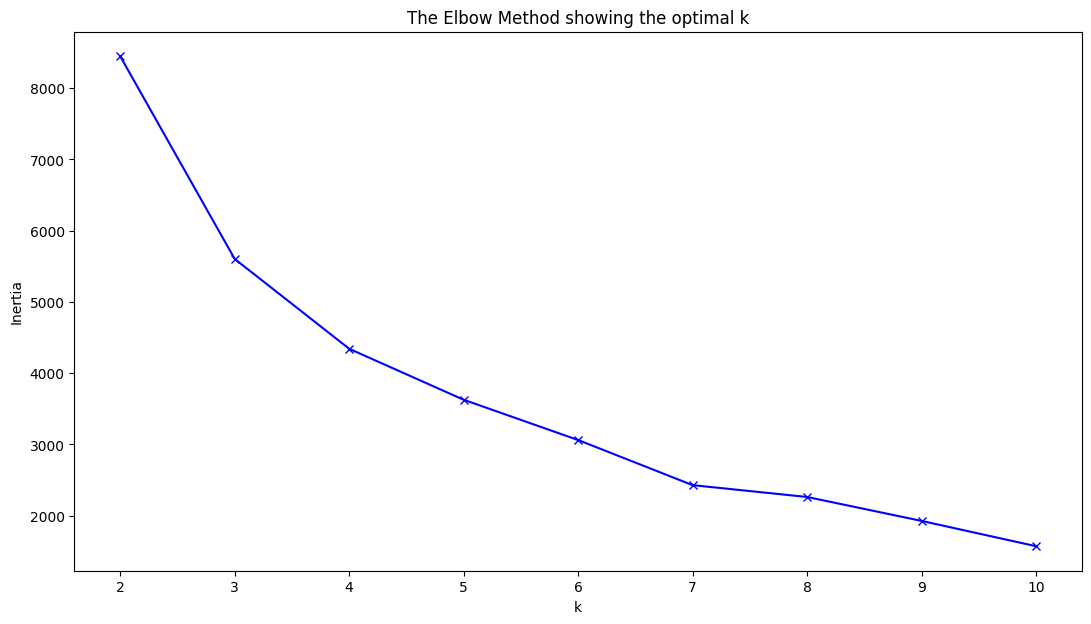

[8449.868614886518, 5604.10973886546, 4342.6561966605195, 3626.979518286367, 3061.4980508058975, 2428.0977735773267, 2262.079656984746, 1926.1046452150747, 1570.8248878761415]


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # Import KMeans from sklearn.cluster
distortions = []
K = range(2,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_sales_segmentation_robust)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(13,7))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

####4.2.2 Silhoutte Analysis

For k=2, the average silhouette score is 0.55283257898493
For k=3, the average silhouette score is 0.4909510496653962
For k=4, the average silhouette score is 0.49862324627781307
For k=5, the average silhouette score is 0.5051263126430299
For k=6, the average silhouette score is 0.5202381121124898
For k=7, the average silhouette score is 0.5341808968468453
For k=8, the average silhouette score is 0.5399413306506066
For k=9, the average silhouette score is 0.5716210878905141
For k=10, the average silhouette score is 0.5813143793230381


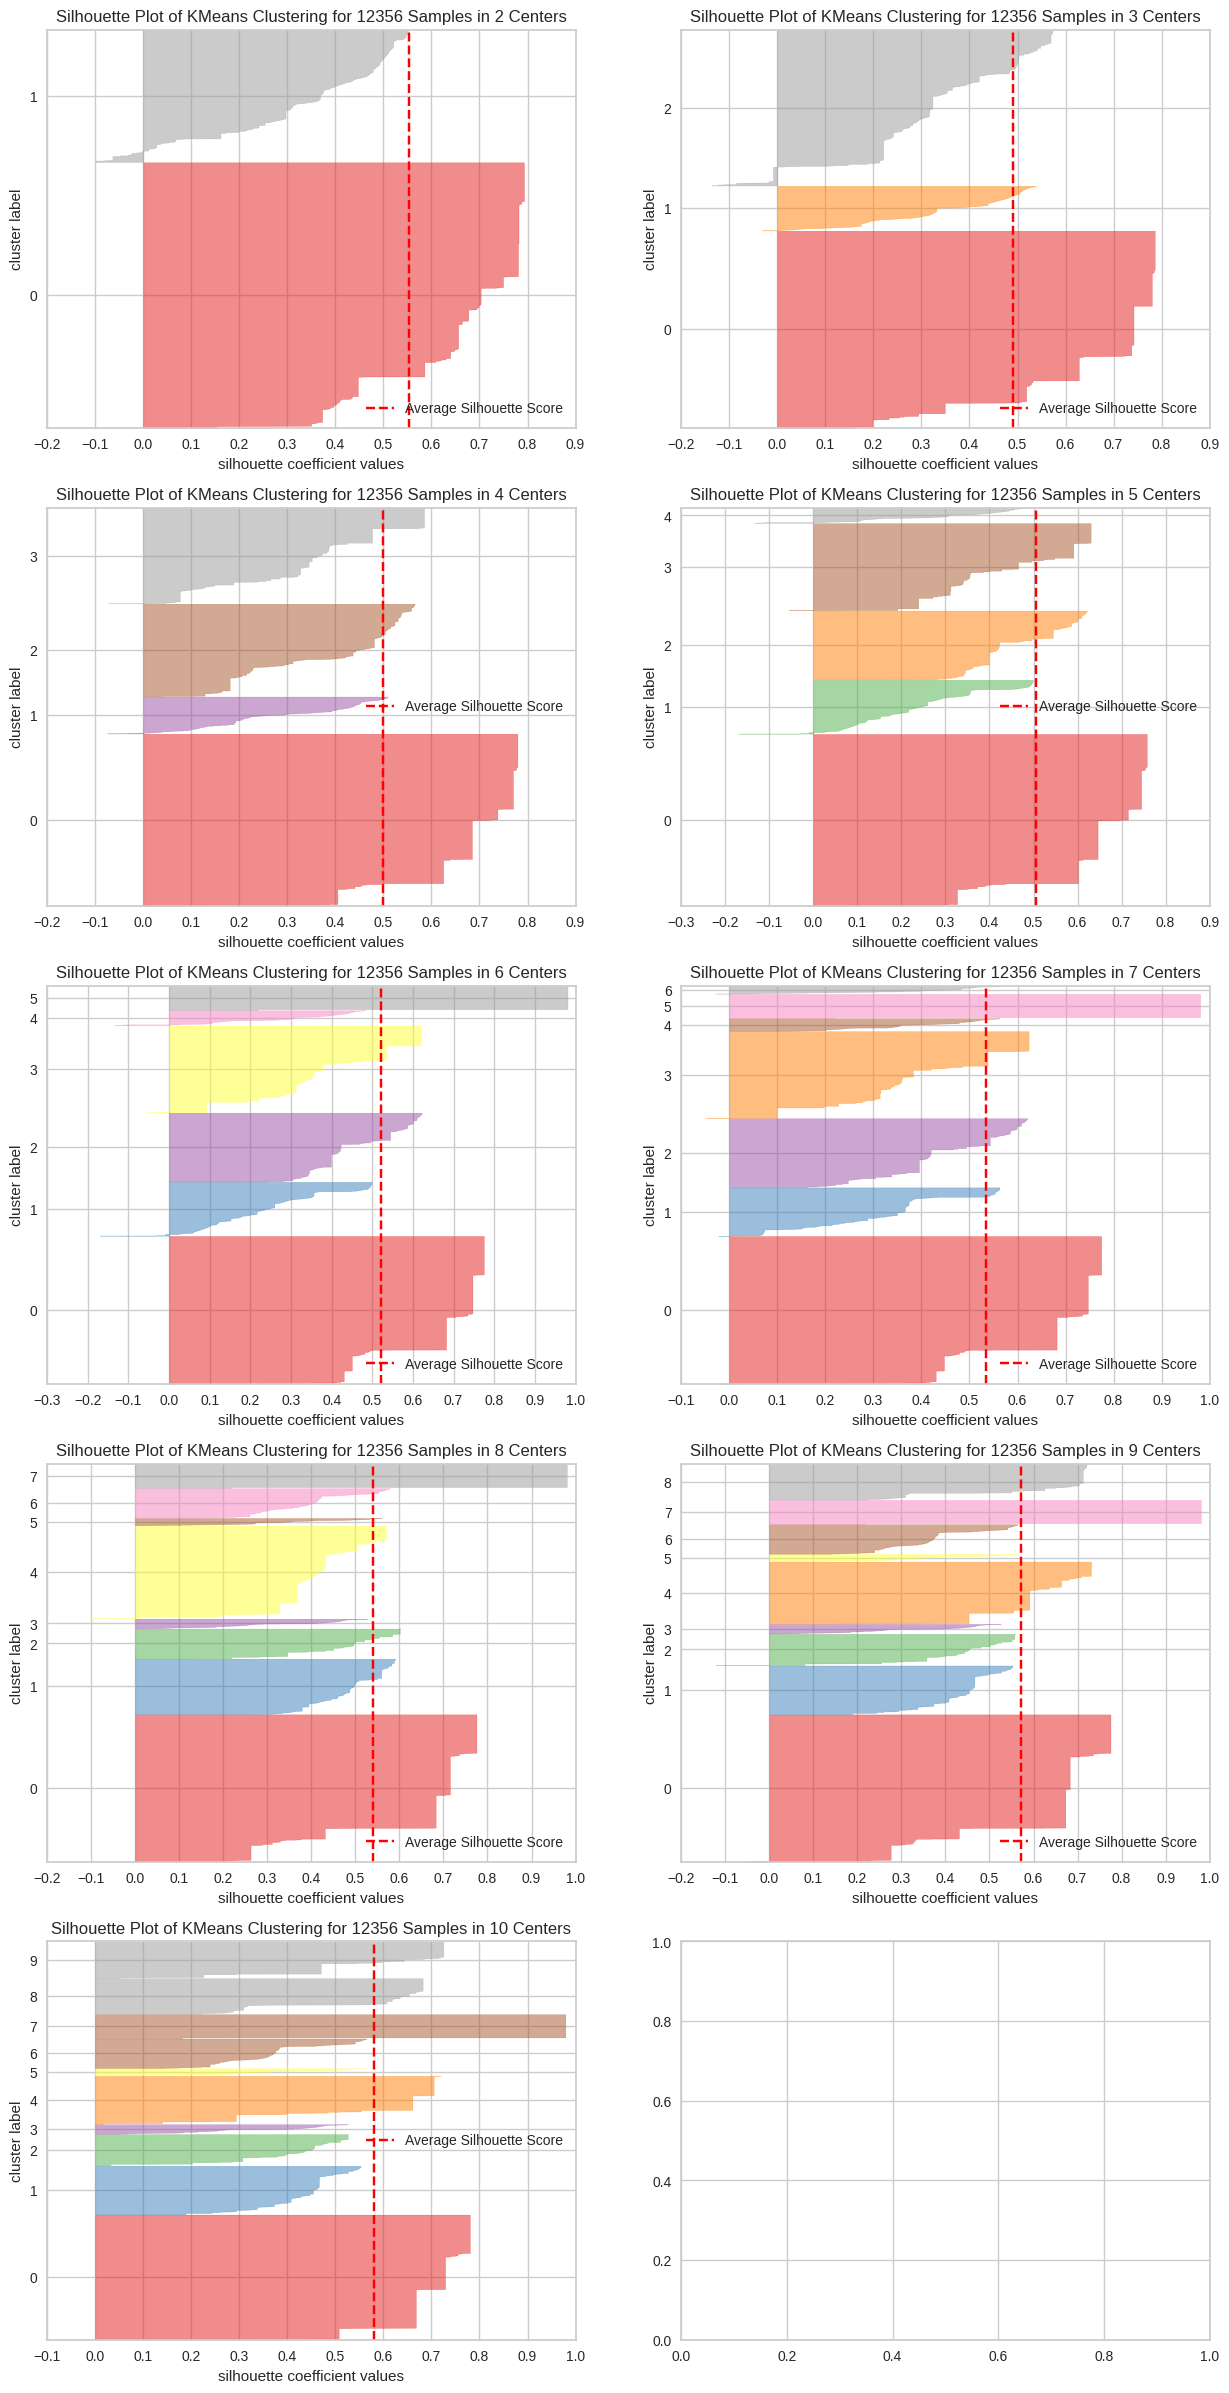

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer # Import the SilhouetteVisualizer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # Import KMeans from sklearn.cluster

# We will display each visualization using subplots with 2 columns and N rows.
# N will adjust based on how many K ranges we choose.
# For example, if there are 11 values of K, we create a 6x2 subplot layout.
# If there are 12, we still create a 6x2 subplot layout.
# (The formula: number of K divided by 2, then rounded up)
# Do the same process for each K_range from 2–10
# Count how many K values will be plotted
# Divide by 2 and round up using np.ceil() — (don’t forget to convert to int)
# Define the figure canvas
# Since we will show each plot on its corresponding subplot axis, we need to know its index
# We can use the enumerate() function to get both the index and the element from the sequence during each iteration (see Appendix)
# To place each chart into its correct subplot index, it’s better to flatten the axes
# That way, the indexes become ordered integer values (see Appendix)

K_range = range(2,11)

banyak_K = len(K_range)

n_baris = int(np.ceil(banyak_K/2))

fig, ax = plt.subplots(n_baris, 2, figsize=(15,30))

for index, K in enumerate(K_range):
  kmeanModel = KMeans(n_clusters=K, random_state=42, n_init='auto')

  sil = SilhouetteVisualizer(kmeanModel, is_fitted=False, ax=ax.flatten()[index])
  sil.fit(df_sales_segmentation_normalized)
  sil.finalize()
  print(f"For k={K}, the average silhouette score is {sil.silhouette_score_}")

Choosing **k = 4** makes sense because:

1. **Elbow Method** shows **k = 4** as the optimal point. After **k = 4**, the decrease in **inertia** slows down, meaning adding more clusters doesn't bring significant improvement.

2. The **Silhouette Score** for **k = 4** is still good, indicating clear separation between clusters without too much overlap.

3. With **k = 4**, you get a sufficient level of detail for understanding the data, while keeping it easy to interpret.

Overall, **k = 4** strikes a good balance between quality and interpretability without making the model too complex.

###4.3 K-Means Clustering Modelling

####4.3.1 K-Means Clustering Modelling with 4 Clusters

In [ ]:
df4_rob = df_sales_segmentation_robust.copy()
df4 = df_sales_segmentation.copy()

In [ ]:
cluster_model = KMeans(n_clusters=4, random_state=42)
cluster_model.fit(df4_rob)

KMeans(n_clusters=4, random_state=42)

In [ ]:
df4_rob['clusters'] = cluster_model.labels_
df4['clusters'] = cluster_model.labels_

In [ ]:
df4.head()

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,age,total_sales_L36M,total_sales_explanation,profit,birth_year,generation,clusters
0,100000006,X,A,91,0,25000.0,1,25000.0,26,5,1996-11-03,26,25000.0,Sales,600.00,1996,Gen Y,0
1,100000038,X,A,69,0,9000.0,5,10000.0,25,10,1971-04-24,52,45000.0,Sales,1080.00,1971,Gen X,1
2,100000382,X,A,123,1,17330.0,6,20000.0,18,6,1953-01-16,70,103980.0,Sales,2495.52,1953,Boomers,3
3,100000612,X,A,84,1,25830.0,6,25000.0,14,7,1997-06-07,25,154980.0,Sales,3719.52,1997,Gen Z,3
4,100000757,X,A,40,0,25000.0,3,25000.0,17,5,1989-09-13,33,75000.0,Sales,1800.00,1989,Gen Y,3


#####a. Cluster Distributin in Last Sales and Count Sales

Text(0.5, 1.0, 'Boxplot of Total Sales by Cluster')

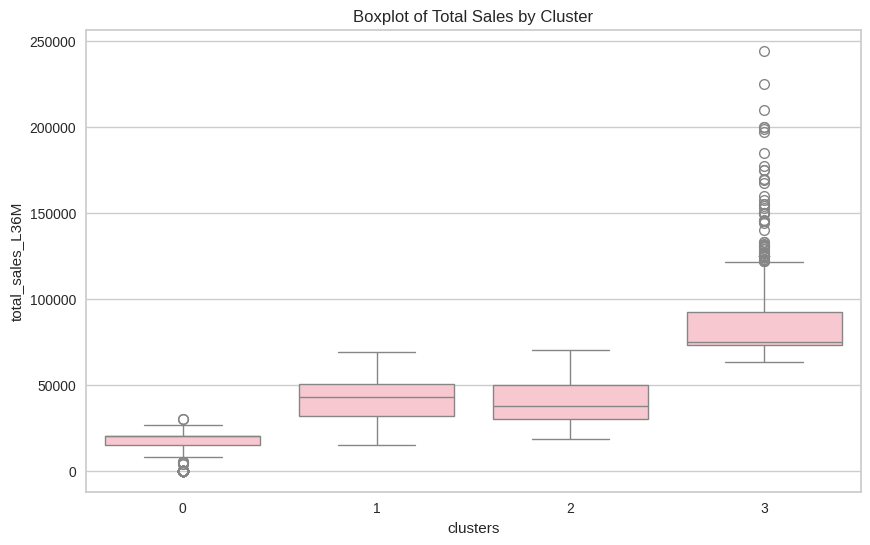

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot ac(data = df4, x ='clusters' , y ='total_sales_L36M', color='pink')
plt.title('Boxplot of Total Sales by Cluster')

Text(0.5, 1.0, 'Boxplot of Count Sales by Cluster')

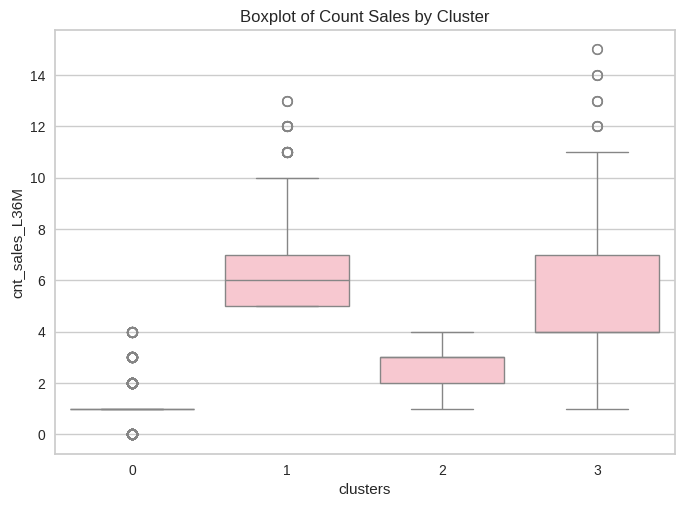

In [ ]:
sns.boxplot (data = df4, x ='clusters' , y ='cnt_sales_L36M', color='pink')
plt.title('Boxplot of Count Sales by Cluster')

#####b. Cluster Visualization

<Axes: xlabel='total_sales_L36M', ylabel='cnt_sales_L36M'>

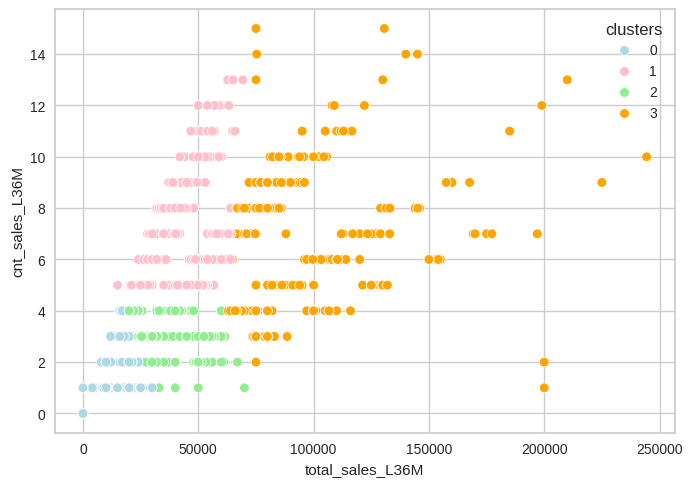

In [ ]:
sns.scatterplot(data=df4, x='total_sales_L36M', y='cnt_sales_L36M', hue='clusters', palette=['lightblue', 'pink', 'lightgreen', 'orange'])

####4.4 Cluster Interpretation

In [ ]:
df4.head()

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,age,total_sales_L36M,total_sales_explanation,profit,birth_year,generation,clusters
0,100000006,X,A,91,0,25000.0,1,25000.0,26,5,1996-11-03,26,25000.0,Sales,600.00,1996,Gen Y,0
1,100000038,X,A,69,0,9000.0,5,10000.0,25,10,1971-04-24,52,45000.0,Sales,1080.00,1971,Gen X,1
2,100000382,X,A,123,1,17330.0,6,20000.0,18,6,1953-01-16,70,103980.0,Sales,2495.52,1953,Boomers,3
3,100000612,X,A,84,1,25830.0,6,25000.0,14,7,1997-06-07,25,154980.0,Sales,3719.52,1997,Gen Z,3
4,100000757,X,A,40,0,25000.0,3,25000.0,17,5,1989-09-13,33,75000.0,Sales,1800.00,1989,Gen Y,3


In [ ]:
df4.groupby('clusters')[['total_sales_L36M', 'cnt_sales_L36M']].agg(['count','mean','min','max','median']).T

clusters                            0             1             2  \
total_sales_L36M count    5461.000000   1744.000000   4300.000000   
                 mean    16528.315327  42331.691514  38516.997674   
                 min         0.000000  15000.000000  18680.000000   
                 max     30000.000000  69290.000000  70000.000000   
                 median  20000.000000  43000.000000  37600.000000   
cnt_sales_L36M   count    5461.000000   1744.000000   4300.000000   
                 mean        1.040469      6.096330      2.770000   
                 min         0.000000      5.000000      1.000000   
                 max         4.000000     13.000000      4.000000   
                 median      1.000000      6.000000      3.000000   

clusters                             3  
total_sales_L36M count      851.000000  
                 mean     85628.472385  
                 min      63000.000000  
                 max     244400.000000  
                 median   75000.000000  
cnt_sales_L36M   count      851.000000  
                 mean         5.347826  
                 min          1.000000  
                 max         15.000000  
                 median       4.000000

1. Cluster 0:

* Characteristics: Low transaction frequency and low total sales.

* Target: Focus on re-engagement strategies to increase transaction frequency. Offer seasonal promotions, reminders, or discounts on future purchases to encourage them to shop more often.

2. Cluster 1:

* Characteristics: Highest transaction frequency and total sales.

* Target: Focus on loyalty programs and exclusive offers for active customers. Use upselling and cross-selling strategies for premium products, as they are already frequent buyers and contribute significantly to revenue.

3. Cluster 2:

* Characteristics: Larger purchases but lower transaction frequency.

* Target: Offer incentives to increase purchase frequency, such as discounts or promotions for their next purchase. Use bundled offers or loyalty points to encourage them to shop more often.

4. Cluster 3:

* Characteristics: Low transaction frequency but higher total sales compared to Cluster 0.

* Target: Since these customers make larger purchases but less frequently, offer personalized high-value product offers. Consider VIP incentives, like exclusive deals, to encourage them to make repeat high-value purchases.

#####4.4.2 Interpretation

In [ ]:
# Step 1: Create a column that flags customers with no sales
# We are assuming 'cnt_sales_L36M' represents the count of sales in the last 36 months
df_sales_segmentation['no_sales'] = df_sales_segmentation['total_sales_L36M'].apply(lambda x: 1 if x == 0 else 0)
df_sales_segmentation['clusters'] = cluster_model.labels_
# Step 2: Group by clusters and calculate the required metrics
segment_summary = df_sales_segmentation.groupby('clusters').agg(
    average_sales=('total_sales_L36M', 'mean'),
    average_transaction_frequency=('cnt_sales_L36M', 'mean'),
    no_sales_proportion=('no_sales', 'mean')  # Proportion of customers with no sales
)

# Step 3: Print the segment summary to see the results
print(segment_summary)



          average_sales  average_transaction_frequency  no_sales_proportion
clusters                                                                   
0          16528.315327                       1.040469             0.137337
1          42331.691514                       6.096330             0.000000
2          38516.997674                       2.770000             0.000000
3          85628.472385                       5.347826             0.000000


1. Cluster 3: Premium Performers
Highest total sales mean (~85.6k).

Fewer transactions than Cluster 1, but higher value per transaction.

Likely composed of high-value, less frequent customers or products.

2. Cluster 1: High-Frequency Winners
Highest sales count per instance (~6.1).

High total sales, but less than Cluster 3.

Ideal cluster for frequent purchase campaigns or loyalty programs.

3. Cluster 2: Middle Ground
Moderate in both sales value and transaction count.

Could be a growth opportunity with targeted upsell strategies.

4. Cluster 0: Low Engagement Risk
Lowest in all metrics.

13.7% of records had no sales — possibly indicating churn risk or irrelevant product/customer group.

This group needs attention or could be excluded from future campaigns.

##Insight And Recommendation

*Business Opportunities and Strategic Recommendations for DaintyBank

The cluster analysis reveals distinct behavioral characteristics among customer groups. The following opportunities and strategies are recommended to maximize engagement and drive financial product adoption across each segment:

*Cluster 1 — High Activity, High Total Sales

1. These customers demonstrate strong loyalty and consistent transaction behavior, contributing significantly to overall revenue.

2. Business Opportunity:
Strengthen long-term engagement and increase premium product penetration.

3. Recommendations:

- Introduce exclusive loyalty benefits, such as tiered rewards or cashback enhancements, to maintain high usage levels.

- Implement targeted upselling strategies for premium credit cards, personal loans, or wealth management services.

- Cross-sell complementary DaintyBank financial products by leveraging established trust and engagement.


*Cluster 2 — High Transaction Value, Lower Frequency

1. This segment makes larger purchases but does not use the card frequently.

2. Business Opportunity:
Increase purchase frequency to unlock greater revenue potential.

3. Recommendations:

- Launch bundled promotions, bonus points multipliers, or recurring usage incentives to motivate more frequent transactions.

- Provide personalized discounts and category-focused offers (e.g., travel, electronics, dining) aligned with their spending patterns.

- Initiate reminder campaigns encouraging credit card usage during seasonal or recurring spend periods.


*Cluster 3 — High Total Sales, Low Frequency

1. Customers contribute strong revenue but lack consistent engagement.

2. Business Opportunity:
Enhance retention and stimulate ongoing high-value usage.

3. Recommendations:

- Deliver premium-tier offers, early access deals, or VIP-style benefits to reinforce exclusivity and relationship value.

- Offer lifecycle-based promotions (e.g., birthday rewards, annual milestone benefits) to encourage repeat usage.

- Introduce personalized financial solutions tailored to high-spending personas, such as instalment plans or investment products.


*Cluster 0 — Low Activity, Low Total Sales

1. These customers are currently disengaged and contribute minimally to revenue.

2. Business Opportunity:
Reactivate dormant customers and strengthen entry-level engagement.

3. Recommendations:

- Run targeted reactivation campaigns including welcome-back rewards, fee waivers, or cashback entry offers.

- Utilize reminder notifications and simple financial product recommendations to improve habit formation.

- Deploy seasonal promotions or micro-incentives to develop early loyalty and gradually improve spending volume.


*Conclusion:

By applying targeted strategies aligned with each segment’s behavior and value contribution, DaintyBank can drive stronger product adoption, improve customer lifetime value, and elevate overall sales performance through data-driven decision-making.